In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from matplotlib import cm
from pyearth import Earth
import

In [45]:
from sklearn.model_selection import train_test_split

def split_data(df, target, val_size=0.2, test_size=0.2, drop_columns=[]):
    x={}
    y={}
    
    train_val, test = train_test_split(df, test_size=test_size)
    train, val = train_test_split(train_val, test_size=val_size/(1-test_size))
    ds = {}
    x["train"] = train.drop(columns=[target]+drop_columns)
    x["val"] = val.drop(columns=[target]+drop_columns)
    x["train_val"] = train_val.drop(columns=[target]+drop_columns)
    x["test"] = test.drop(columns=[target]+drop_columns)
    y["train"] = train[target]
    y["val"] = val[target]
    y["train_val"] = train_val[target]
    y["test"] = test[target]
    
    return x,y

In [28]:
# MARS
# SVR
# KNN
# Creating synthetic data
np.random.seed(seed=12345)
df = pd.DataFrame(np.random.uniform(size=(200,10)), columns = [f"x{i+1}" for i in range(10)])
df["error"] = np.random.normal(size=200)
df["target"] = (
    10*np.sin(np.pi*df["x1"]*df["x2"]) +
    20*(df["x3"]-0.5)**2 + 
    10*df["x4"] + 
    5*df["x5"] +
    df["error"])
X = df.drop(columns=["target", "error"])
y = df["target"]

In [46]:
x, y=split_data(df, "target", drop_columns=["error"])

In [85]:
mars = Earth(feature_importance_type='gcv')
mars.fit(x["train_val"], y["train_val"])
mars.score(x["test"], y["test"])

/home/roger/.conda/envs/apm/lib/python3.9/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/home/roger/.conda/envs/apm/lib/python3.9/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


0.8671522399376402

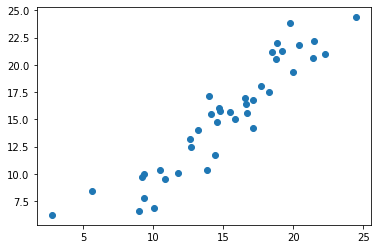

In [88]:
plt.scatter(mars.predict(x["test"]), y["test"])
plt.show()

In [87]:
print(mars.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      -14.7627     
x4              Yes     None         
h(x1-0.613266)  Yes     None         
h(0.613266-x1)  Yes     None         
h(x2-0.573879)  Yes     None         
h(0.573879-x2)  Yes     None         
h(x3-0.49255)   No      10.5864      
h(0.49255-x3)   No      10.2626      
x5              Yes     None         
h(x1-0.195795)  No      5.20988      
h(0.195795-x1)  No      -25.7418     
h(x5-0.670874)  No      -14.9477     
h(0.670874-x5)  Yes     None         
h(x5-0.888561)  Yes     None         
h(0.888561-x5)  No      48.0599      
x9              Yes     None         
h(x4-0.803585)  Yes     None         
h(0.803585-x4)  Yes     None         
h(x2-0.521645)  Yes     None         
h(0.521645-x2)  No      -12.5043     
h(x5-0.291053)  No      95.2904      
h(0.291053-x5)  Yes     None         
h(x5-0.324602)  Yes     None         


In [86]:
print(mars.summary_feature_importances(sort_by="gcv"))

        gcv
x4      0.48   
x1      0.26   
x2      0.16   
x3      0.11   
x10     0.00   
x9      0.00   
x8      0.00   
x7      0.00   
x6      0.00   
x5      0.00   



In [82]:
# SVR
epsilon = 0.5 # np.geomspace(0.1, 5, num=10)
cost = 1 # np.geomspace(0.1, 10, num=10)

scores={}

for epsilon in np.geomspace(0.01, 5, num=10):
    for cost in np.geomspace(1, 20, num=10):
        svr = SVR(kernel="rbf", C=cost, epsilon=epsilon)
        svr.fit(X=x["train"], y=y["train"])
        scores[(epsilon, cost)] = svr.score(X=x['val'], y=y['val'])
        
best_epsilon, best_cost = max(scores, key=scores.get)

In [83]:
svr=SVR(kernel="rbf", C=best_cost, epsilon=best_epsilon)
svr.fit(X=x["train_val"], y=y["train_val"])
svr.score(X=x['test'], y=y['test'])

0.8126577178915939